In [0]:
import numpy as np

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100


In [0]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):        
        #Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def loss(self, yHat, y):
        #Compute loss for given X,y, use weights already stored in class.
        J = 0.5*sum((y-yHat)**2)
        return J
        
    
    def backward(self,X, yHat, y):
        self.yHat = yHat
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        return dJdW1,dJdW2#np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [0]:
class OptimSGD(object):
    def __init__(self,learning_rate = .001):
        self.lr = learning_rate
    
    def step(self,weight_list,gradient):
        uw = []
        for w,grd in zip(weight_list,gradient) : 
            uw.append(w - self.lr * grd)
        return uw
      
class OptimMom(object): #!Task1 : Implement SGD with Momentum
    def __init__(self,lr = .1,momTerm = .5):
        self.mt = momTerm
        self.lr = lr 
        self.pG = None
        return 
      
    def step(self,weight_list,gradient):
        uw = []
        if self.pG is None :
          self.pG = []
          for w,grd in zip(weight_list,gradient) :
            uw.append(w - self.lr *grd)
            self.pG.append(grd)
        else :
          for i in range(len(weight_list)):
            w = weight_list[i];
            grd = gradient[i] + self.mt*self.pG[i]
            
            uw.append(w - self.lr * grd)
            
            self.pG[i] = grd
        
        return uw

In [0]:
def train(NN,X, y,epoch = 5000,optim = None):
    list_loss = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)
        
        gradW1,gradW2 = NN.backward(X,yHat,y)
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])
        
        if i%100 == 0 : 
            loss = NN.loss(yHat,y)
            print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)
    return list_loss
    

before  [[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]] [[0.75]
 [0.82]
 [0.93]] = [[0.28261928]
 [0.2785953 ]
 [0.27769824]]
Loss 0=[0.46853068]
Loss 100=[0.38768329]
Loss 200=[0.3138309]
Loss 300=[0.25044494]
Loss 400=[0.19854831]
Loss 500=[0.15739166]
Loss 600=[0.12536649]
Loss 700=[0.10067565]
Loss 800=[0.08168361]
Loss 900=[0.06704144]
Loss 1000=[0.05569363]
Loss 1100=[0.04683744]
Loss 1200=[0.03987093]
Loss 1300=[0.03434526]
Loss 1400=[0.02992573]
Loss 1500=[0.02636189]
Loss 1600=[0.02346534]
Loss 1700=[0.02109335]
Loss 1800=[0.019137]
Loss 1900=[0.01751253]
Loss 2000=[0.01615499]
Loss 2100=[0.01501364]
Loss 2200=[0.01404856]
Loss 2300=[0.01322806]
Loss 2400=[0.01252688]
Loss 2500=[0.01192468]
Loss 2600=[0.01140502]
Loss 2700=[0.01095453]
Loss 2800=[0.01056226]
Loss 2900=[0.0102192]
Loss 3000=[0.0099179]
Loss 3100=[0.00965217]
Loss 3200=[0.00941684]
Loss 3300=[0.00920758]
Loss 3400=[0.00902075]
Loss 3500=[0.00885327]
Loss 3600=[0.00870252]
Loss 3700=[0.00856629]
Loss 3800=[0.00844267]
Loss 390

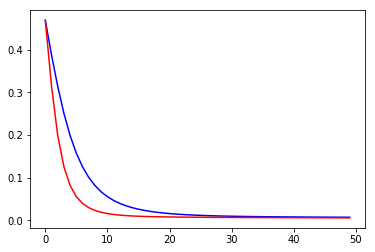

In [23]:
import copy

NN = Neural_Network()
NN2 = copy.copy(NN)#Neural_Network()

print('before ',X,y,'=',NN.forward(X))
#Train network with new data:

optim = OptimSGD(.01)
optim2 = OptimMom(.01)

list_loss = train(NN,X,y,optim = optim)
list_loss2 = train(NN2,X,y,optim = optim2)

print('after ',X,y,'=',NN.forward(X))

#!Task 2 : Analyze the different on term of both losses
import matplotlib.pyplot as plt
plt.plot(list_loss,c='blue') #SGD
plt.plot(list_loss2,c='red') #MOM

print(list_loss)
print(list_loss2)

plt.show()